<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/PRSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK PARA O ARQUIVO (GITHUB)

https://github.com/MatheusBLQueiroz/Esp


https://raw.githubusercontent.com/MatheusBLQueiroz/Esp/master/PRSA.csv

In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from math import log

In [0]:


#importa arquivo com dados do laboratório e o do armazém. O arquivo se chama COLETIVA e é extraído do sistema de logística da empresa, o SAP.
weather_raw=pd.read_csv(r'https://raw.githubusercontent.com/MatheusBLQueiroz/Esp/master/PRSA.csv',encoding = "ISO-8859-1", sep=";", decimal=",", thousands=".")


In [3]:

#display mostra .head() a qualquer momento no código. Aqui vemos a "cara" da planilha importada
display(weather_raw.head())  

weather_raw.dtypes
"""
IDENTIFICANDO AS VARIÁVEIS

No           int64  #DISCRETO #ORDINAL
year         int64  #DISCRETO #ORDINAL
month        int64  #DISCRETO #ORDINAL
day          int64  #DISCRETO #ORDINAL
hour         int64  #DISCRETO #ORDINAL
PM2.5      float64  #CONTINUO 
PM10       float64  #CONTINUO 
SO2        float64  #CONTINUO 
NO2        float64  #CONTINUO 
CO         float64  #CONTINUO 
O3         float64  #CONTINUO 
TEMP       float64  #CONTINUO 
PRES       float64  #CONTINUO 
DEWP       float64  #CONTINUO 
RAIN       float64  #CONTINUO 
wd          object  #CONTINUO 
WSPM       float64  #CONTINUO 
station     object  #NOMINAL

"""






,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-23.0,10208.0,-197.0,0.0,E,5.0,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-25.0,10213.0,-19.0,0.0,ENE,7.0,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,10213.0,-199.0,0.0,ENE,2.0,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-36.0,10218.0,-191.0,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-35.0,10223.0,-194.0,0.0,N,21.0,Changping


'\nIDENTIFICANDO AS VARIÁVEIS\n\nNo           int64  #DISCRETO #ORDINAL\nyear         int64  #DISCRETO #ORDINAL\nmonth        int64  #DISCRETO #ORDINAL\nday          int64  #DISCRETO #ORDINAL\nhour         int64  #DISCRETO #ORDINAL\nPM2.5      float64  #CONTINUO \nPM10       float64  #CONTINUO \nSO2        float64  #CONTINUO \nNO2        float64  #CONTINUO \nCO         float64  #CONTINUO \nO3         float64  #CONTINUO \nTEMP       float64  #CONTINUO \nPRES       float64  #CONTINUO \nDEWP       float64  #CONTINUO \nRAIN       float64  #CONTINUO \nwd          object  #CONTINUO \nWSPM       float64  #CONTINUO \nstation     object  #NOMINAL\n\n'

EXCLUINDO COLUNAS DESNECESSÁRIAS

In [4]:
weather_loc=weather_raw.loc[:,['year','month','SO2','NO2','CO','station']]

weather_loc.head(100)

,year,month,SO2,NO2,CO,station
0,2013,3,13.0,7.0,300.0,Changping
1,2013,3,6.0,6.0,300.0,Changping
2,2013,3,22.0,13.0,400.0,Changping
3,2013,3,12.0,8.0,300.0,Changping
4,2013,3,14.0,8.0,300.0,Changping
...,...,...,...,...,...,...
95,2013,3,21.0,43.0,1200.0,Changping
96,2013,3,20.0,37.0,900.0,Changping
97,2013,3,38.0,66.0,1600.0,Changping
98,2013,3,32.0,54.0,1399.0,Changping


DEFININDO POPULAÇÃO

In [5]:
weather_months=weather_loc[(weather_loc['month']<=3)] #escolhendo população do primeiro trimestre

weather_years=weather_months[(weather_loc['year']>=2015) ] #escolhendo população de 2015, 2016 e 2017


#população formada
weather_pop = weather_years
weather_pop.shape




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(17280, 6)

LIMPANDO

year         0
month        0
SO2        224
NO2        256
CO         226
station      0
dtype: int64

year         0
month        0
SO2        224
NO2        256
CO         226
station      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


year       0
month      0
SO2        0
NO2        0
CO         0
station    0
dtype: int64

count    16861.000000
mean      1388.879663
std       1310.598845
min        100.000000
25%        500.000000
50%        900.000000
75%       1900.000000
max      10000.000000
Name: CO, dtype: float64

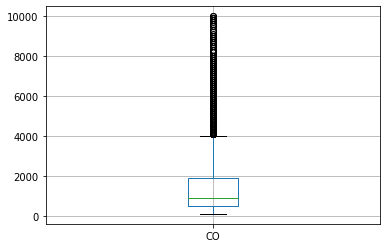

In [6]:

#encontrando valores NA
display(weather_pop.isna().sum())
#encontrando valores NULL
display(weather_pop.isnull().sum())

weather_pop.dropna(axis=0, how = 'any', inplace=True)

display(weather_pop.isna().sum())

weather_pop.shape

# Data FRAME COM NA TRATADO

display(weather_pop.boxplot('CO'))

display(weather_pop['CO'].describe())




count    16861.000000
mean        19.148568
std         21.600155
min          1.000000
25%          4.000000
50%         12.000000
75%         27.000000
max        589.000000
Name: SO2, dtype: float64

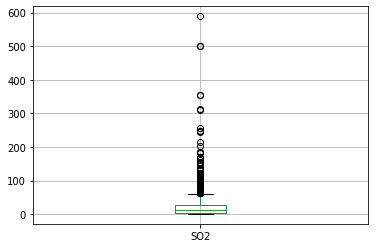

In [7]:
display(weather_pop['SO2'].describe())

display(weather_pop.boxplot('SO2'))



count    16861.000000
mean        47.352470
std         36.415086
min          2.000000
25%         18.000000
50%         40.000000
75%         70.000000
max        897.000000
Name: NO2, dtype: float64

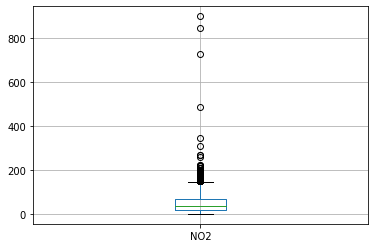

In [8]:
display(weather_pop['NO2'].describe())

display(weather_pop.boxplot('NO2'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


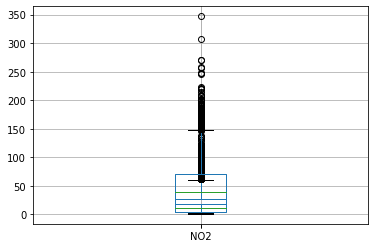

In [9]:

#TRANTANDO OUTLIERS

#custo_coletiva_d969=custo_coletiva_d969.drop(['CustoRecente_log'], axis=1)

weather_outlier_solved1=weather_pop[weather_pop['SO2']<=300]

weather_outlier_solved2=weather_outlier_solved1[weather_pop['NO2']<=400]

#mostrando que os outliers de SO2 foram removidos
display(weather_outlier_solved2.boxplot('SO2'))

#mostrando que os outliers de NO2 foram removidos
display(weather_outlier_solved2.boxplot('NO2'))









In [10]:

#selecionando valores maximos

#aproveitando que describe() fornece o valor máximo para cada coluna, segue:
max_SO2=weather_outlier_solved2['SO2'].describe()[7]

max_CO=weather_outlier_solved2['CO'].describe()[7]

max_NO2=weather_outlier_solved2['NO2'].describe()[7]

#normalizando
weather_outlier_solved2['SO2']=weather_outlier_solved2['SO2']/max_SO2

weather_outlier_solved2['CO']=weather_outlier_solved2['CO']/max_CO

weather_outlier_solved2['NO2']=weather_outlier_solved2['NO2']/max_NO2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [11]:
#APRESENTANDO DFs

#população
weather_population=weather_outlier_solved2

#ESTATISTICA POPULAÇÃO

display('POPULAÇÃO', weather_population.describe())


#ESTATISTICA PRIMEIRO GRUPO
weather_sample_1=weather_population.sample(frac=0.1)
display(weather_sample_1)

display('AMOSTRA 1',weather_sample_1.describe())


#ESTATISTICA SEGUNDO GRUPO

weather_sample_2= weather_population.sample(frac=0.1)
display(weather_sample_2)

display('AMOSTRA 2',weather_sample_2.describe())

'POPULAÇÃO'

,year,month,SO2,NO2,CO
count,16851.000000,16851.000000,16851.000000,16851.000000,16851.000000
mean,2015.871818,1.862797,0.073860,0.135986,0.138835
std,0.777469,0.790627,0.077474,0.100153,0.131004
min,2015.000000,1.000000,0.003891,0.005764,0.010000
25%,2015.000000,1.000000,0.015564,0.051873,0.050000
50%,2016.000000,2.000000,0.046693,0.115274,0.090000
75%,2016.000000,3.000000,0.105058,0.201729,0.190000
max,2017.000000,3.000000,1.000000,1.000000,1.000000


,year,month,SO2,NO2,CO,station
17060,2015,2,0.260700,0.331412,0.25,Changping
34867,2017,2,0.038911,0.149856,0.07,Changping
105144,2017,2,0.023346,0.086455,0.11,Huairou
52780,2015,3,0.007782,0.025937,0.02,Gucheng
25643,2016,2,0.035019,0.141210,0.05,Changping
...,...,...,...,...,...,...
96295,2016,2,0.019455,0.100865,0.08,Huairou
53129,2015,3,0.007782,0.028818,0.04,Gucheng
33994,2017,1,0.062257,0.198847,0.13,Changping
69873,2017,2,0.124514,0.242075,0.10,Gucheng


'AMOSTRA 1'

,year,month,SO2,NO2,CO
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.00000
mean,2015.872404,1.852819,0.074226,0.132365,0.13305
std,0.773510,0.775018,0.080239,0.098161,0.12701
min,2015.000000,1.000000,0.003891,0.005764,0.01000
25%,2015.000000,1.000000,0.019455,0.048991,0.04000
50%,2016.000000,2.000000,0.046693,0.115274,0.09000
75%,2016.000000,2.000000,0.105058,0.193084,0.18000
max,2017.000000,3.000000,0.957198,0.634006,0.90000


,year,month,SO2,NO2,CO,station
26910,2016,3,0.027237,0.089337,0.05,Changping
25952,2016,2,0.007782,0.095101,0.04,Changping
69960,2017,2,0.023346,0.121037,0.11,Gucheng
26920,2016,3,0.011673,0.057637,0.04,Changping
53083,2015,3,0.011673,0.109510,0.06,Gucheng
...,...,...,...,...,...,...
69261,2017,1,0.066148,0.256484,0.18,Gucheng
96748,2016,3,0.027237,0.074928,0.10,Huairou
25455,2016,1,0.042802,0.103746,0.02,Changping
96868,2016,3,0.007782,0.020173,0.02,Huairou


'AMOSTRA 2'

,year,month,SO2,NO2,CO
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000
mean,2015.858160,1.898516,0.071803,0.135418,0.139674
std,0.763283,0.794745,0.074796,0.098956,0.132331
min,2015.000000,1.000000,0.003891,0.005764,0.010000
25%,2015.000000,1.000000,0.015564,0.051873,0.040000
50%,2016.000000,2.000000,0.046693,0.115274,0.090000
75%,2016.000000,3.000000,0.105058,0.198847,0.190000
max,2017.000000,3.000000,0.964981,0.645533,0.980000


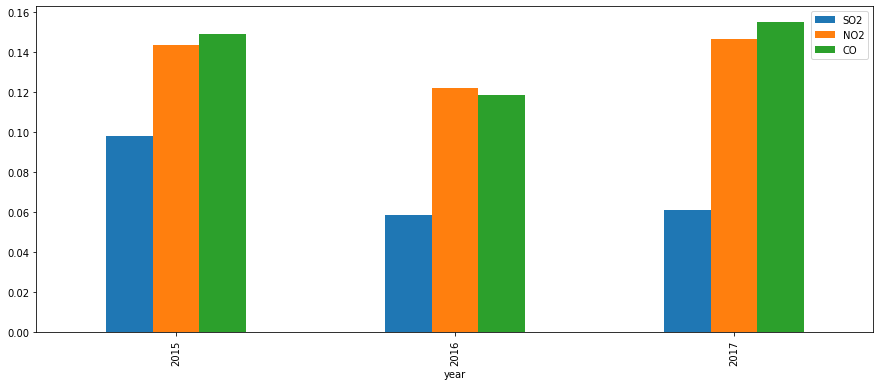

In [12]:
#GRÁFICO

#TRABALHANDO COM O GRUPO 1, UMA VEZ QUE FOI PROVADO SER BEM SUCEDIDO 

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].mean().plot.bar(figsize=(15,6))

#weather_sample_1.plot(x='year',y='CO').hist()




